Ecommerce Customer yearly amount spent prediction model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Step 1: Load the data set

In [3]:
data= pd.read_csv("/content/Ecommerce Customers.txt")

In [4]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
data.shape

(500, 8)

In [6]:
data.dtypes

,0
Email,object
Address,object
Avatar,object
Avg. Session Length,float64
Time on App,float64
Time on Website,float64
Length of Membership,float64
Yearly Amount Spent,float64


In [7]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


Step 2:

In [9]:
data.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


Step 3: Descriptive statistics

In [10]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Step 4: Data Preprocessing

In [12]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
data = data.drop(columns=["Email","Address","Avatar"])

In [14]:
data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [15]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


Step 5: Exploratory data analysis

### Scatter Plot: Avg. Session Length vs. Yearly Amount Spent

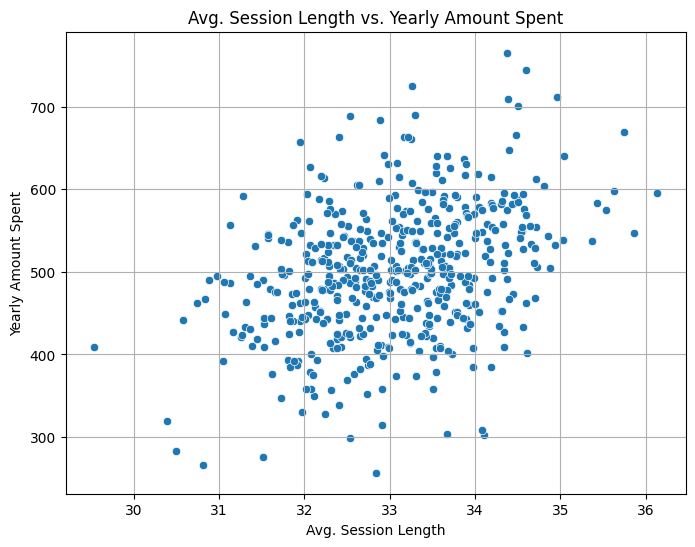

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=data)
plt.title('Avg. Session Length vs. Yearly Amount Spent')
plt.xlabel('Avg. Session Length')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()

### Scatter Plot: Time on App vs. Yearly Amount Spent

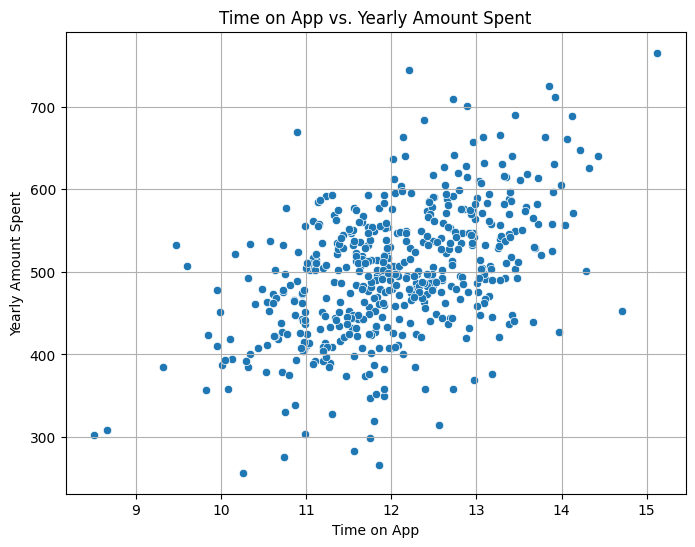

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=data)
plt.title('Time on App vs. Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()

### Scatter Plot: Time on Website vs. Yearly Amount Spent

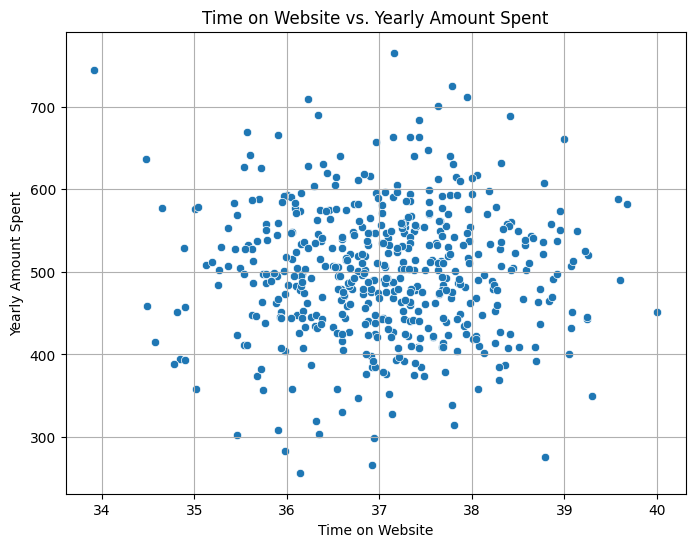

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=data)
plt.title('Time on Website vs. Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()

### Scatter Plot: Length of Membership vs. Yearly Amount Spent

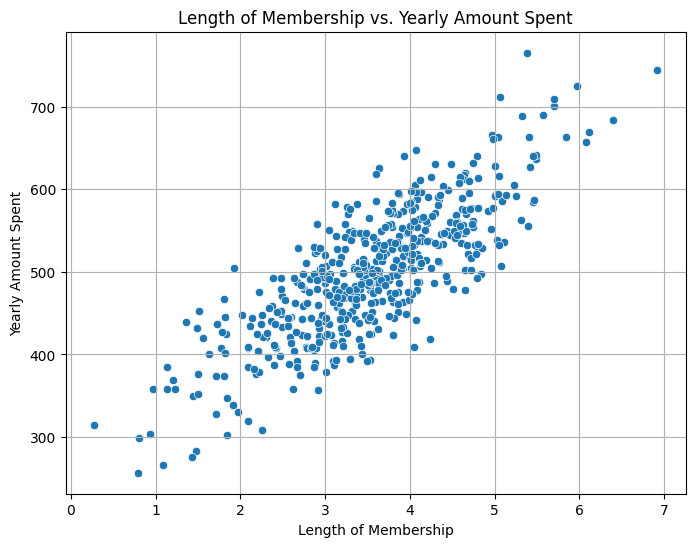

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=data)
plt.title('Length of Membership vs. Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()

### Box plot

Box Plot: Avg. Session Length (Binned) vs. Yearly Amount Spent

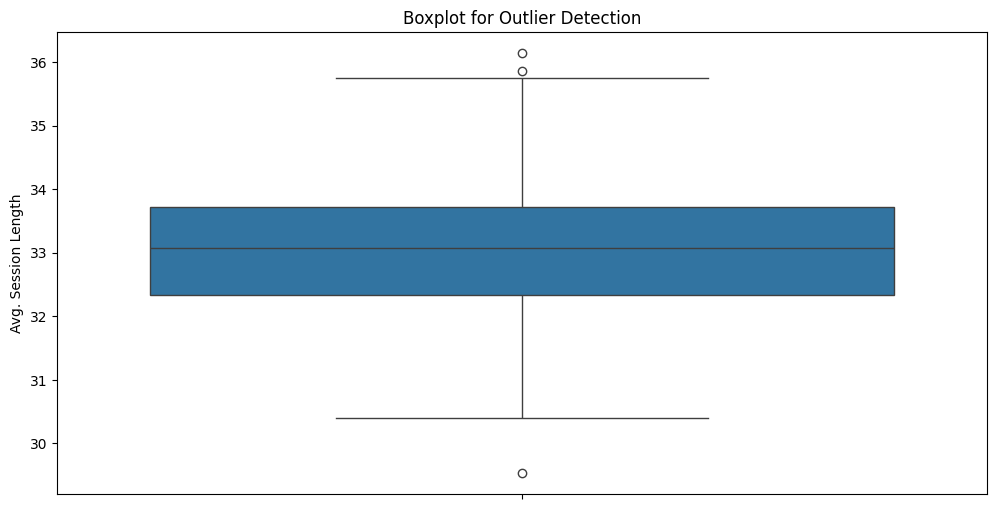

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Avg. Session Length'])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Box Plot: Time on App (Binned) vs. Yearly Amount Spent

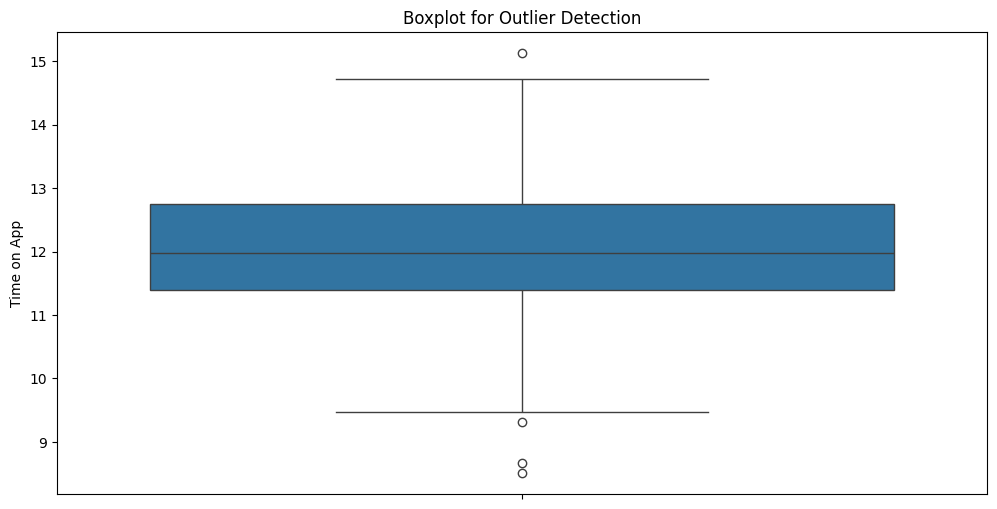

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Time on App'])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Box Plot: Time on Website (Binned) vs. Yearly Amount Spent


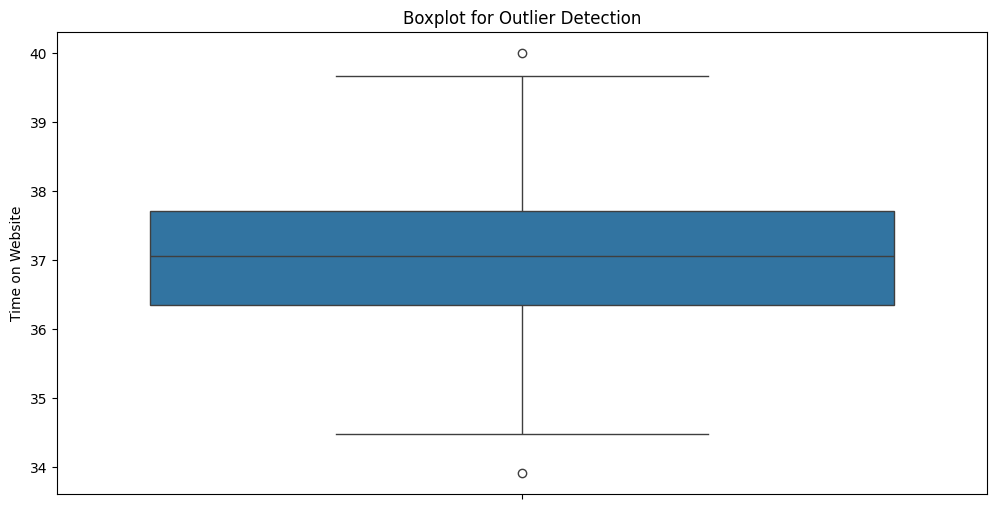

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Time on Website'])
plt.title("Boxplot for Outlier Detection")
plt.show()



Box Plot: Length of Membership (Binned) vs. Yearly Amount Spent

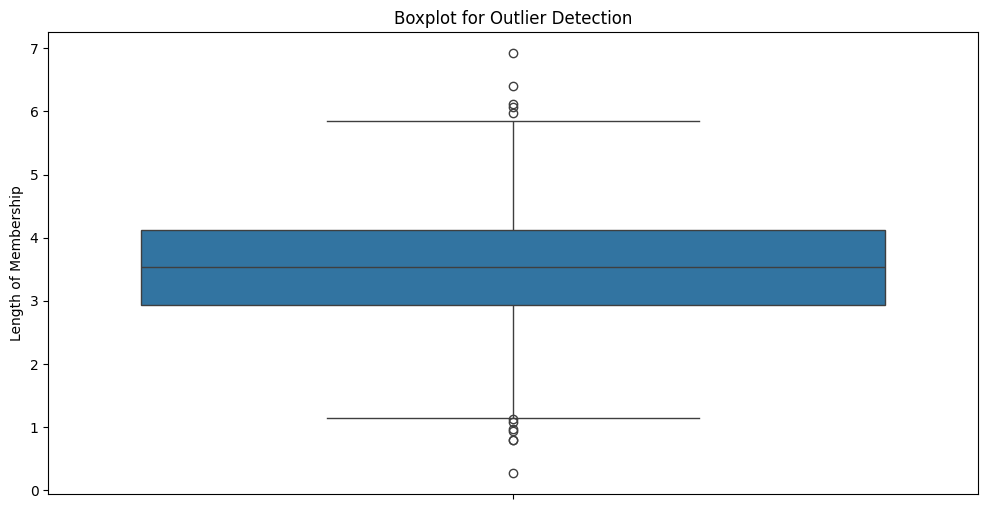

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Length of Membership'])
plt.title("Boxplot for Outlier Detection")
plt.show()

### Pair Plot of Numerical Features

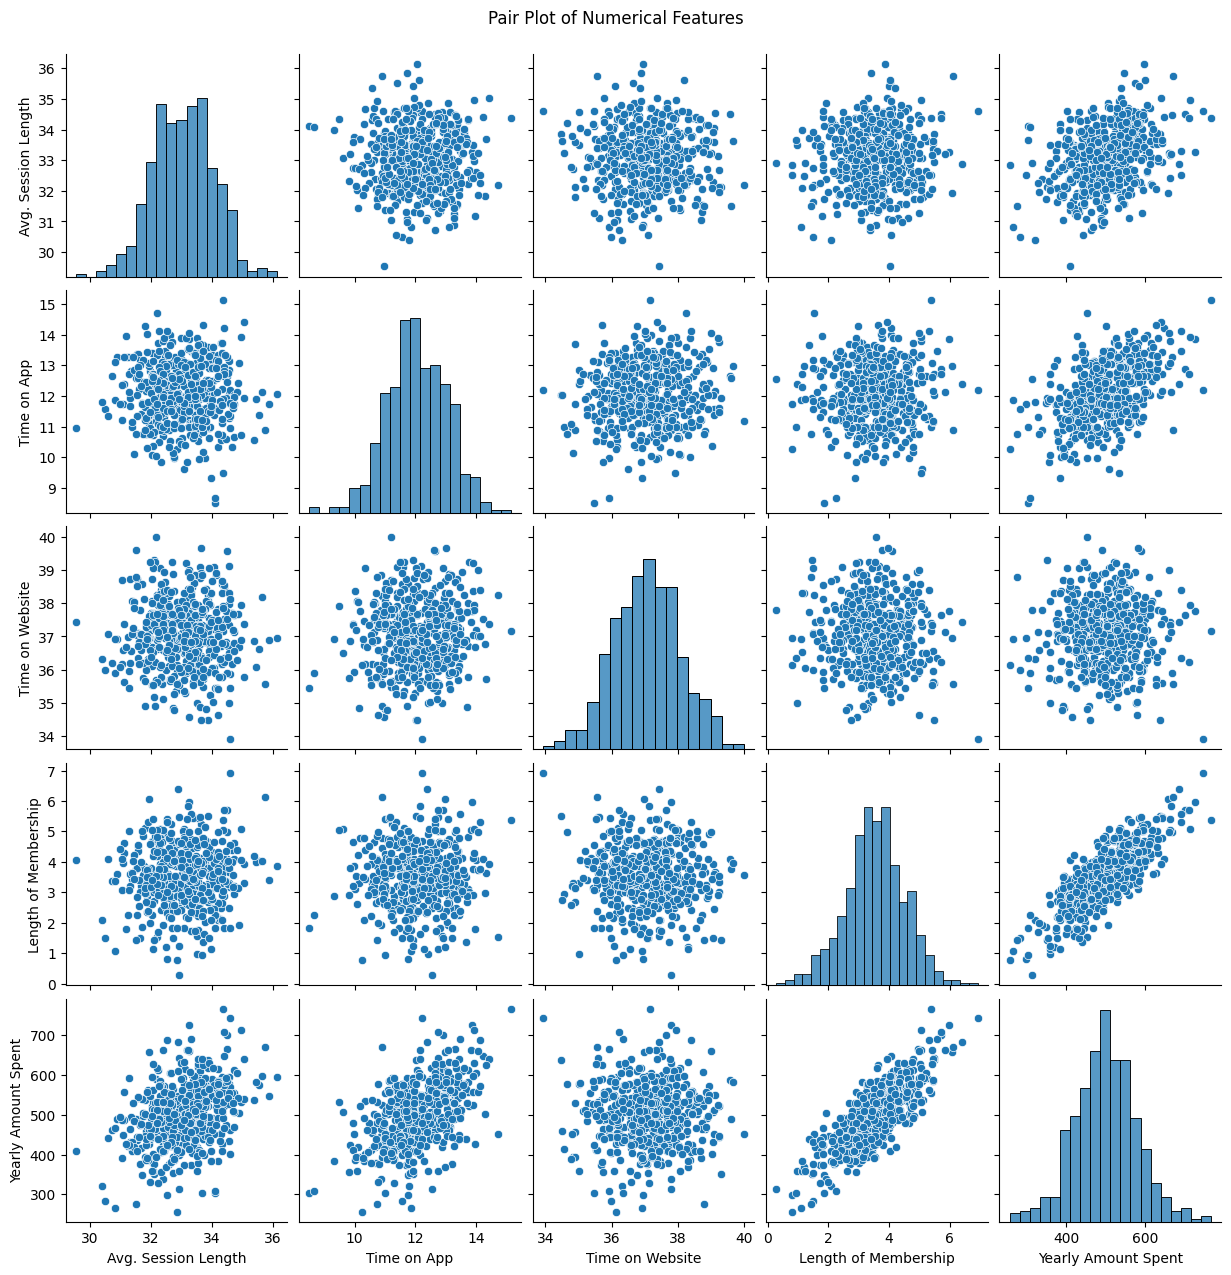

In [50]:
# Create a pair plot to visualize relationships between all numerical variables
sns.pairplot(data)
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Adjust title position
plt.show()

### Correlation Matrix

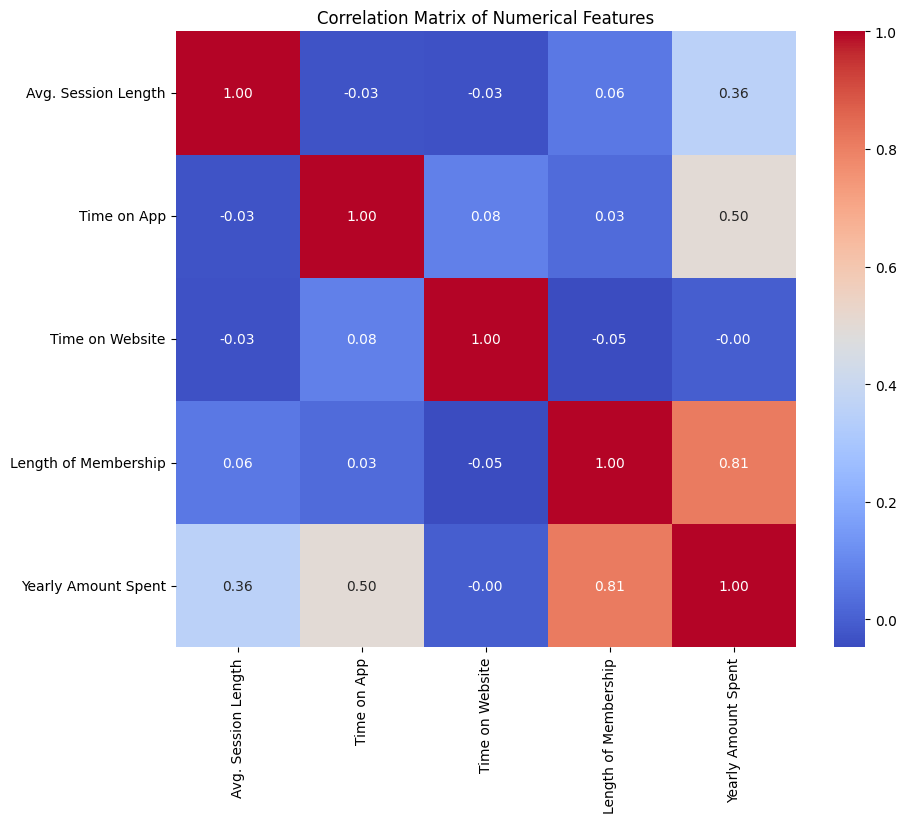

In [61]:
# Calculate the correlation matrix
# Temporarily drop non-numeric (binned) columns before calculating correlation
corr_matrix = data.drop(columns=[col for col in data.columns if '_binned' in str(col)], errors='ignore').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Step 6: Splitting the data

In [74]:
X = data.drop(columns=['Yearly Amount Spent'] + [col for col in data.columns if '_binned' in str(col)], axis=1)
y = data['Yearly Amount Spent']

Step 7: Train - Test Split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2,random_state=42)

In [77]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (400, 4)
X_test shape: (100, 4)


Step 8 : Model Traninig

In [94]:
#Model training
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [79]:
print("\nModel Coefficient:")
print(model.coef_)
print("\nModel Intercept:")
print(model.intercept_)


Model Coefficient:
[25.5962591  38.78534598  0.31038593 61.89682859]

Model Intercept:
-1044.2574146365582


Step 9: prediction

In [80]:
y_pred = model.predict(X_test)

Step 10: Model Evaluation

In [81]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [82]:
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Model Evaluation:
Mean Squared Error: 109.8637411839399
R-squared: 0.9778130629184127


Step 11: Visualizing prediction

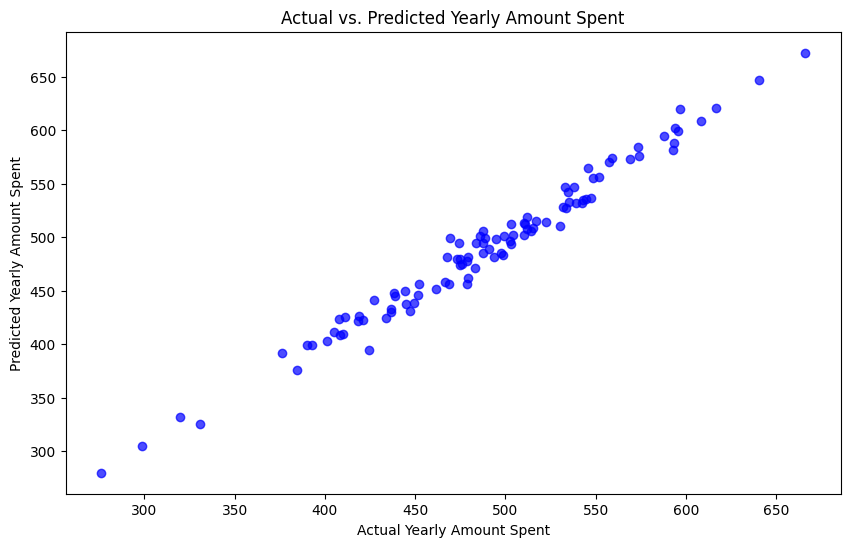

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs. Predicted Yearly Amount Spent")
plt.show()

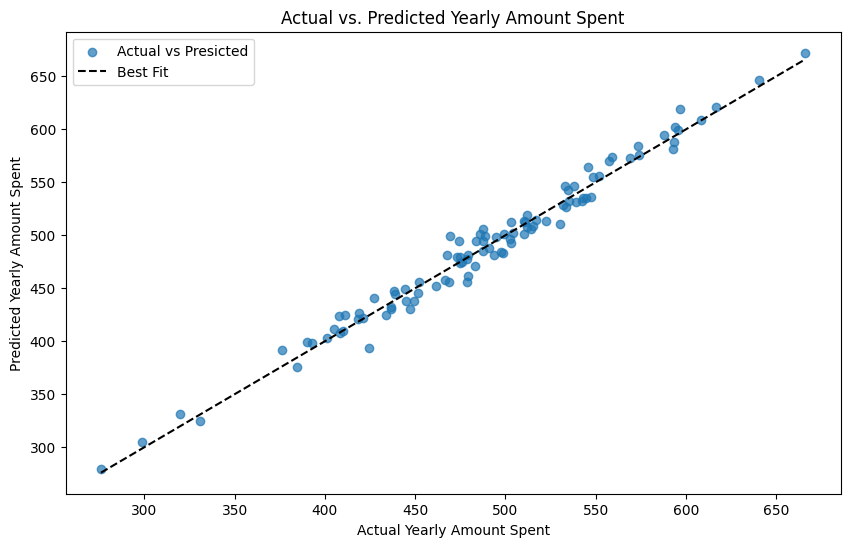

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Actual vs Presicted")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--', label='Best Fit')
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs. Predicted Yearly Amount Spent")
plt.legend()
plt.show()

In [87]:
!pip install joblib

In [88]:
import joblib
joblib.dump(model,"linear regression_model.pkl")
print("\nmodel saved as'linear_regression_model.pkl")


model saved as'linear_regression_model.pkl


Step 12: User input for preiction

In [96]:
#USER INPUT FOR PREDICTION
def predict_user_input():
  print('enter the details for prediction:')
  avg_session_length = float(input('average session length:'))
  time_on_app = float(input('time on app:'))
  time_on_website = float(input('time on website:'))
  length_of_membership = float(input('length of membership:'))

  #create dataframe for input
  user_data = pd.DataFrame({
      'Avg. Session Length': [avg_session_length],
      'Time on App': [time_on_app],
      'Time on Website': [time_on_website],
      'Length of Membership': [length_of_membership]
  })

  #load the saved data model and predict
  loaded_model = joblib.load('linear regression_model.pkl')
  prediction = loaded_model.predict(user_data)
  print(f'predicted yearly amount spent: ${prediction[0]:.2f}')

In [97]:
predict_user_input()

enter the details for prediction:
average session length:1
time on app:2
time on website:3
length of membership:4
predicted yearly amount spent: $-692.57
